# Biomechanical features of orthopedic patients 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1-)Veriye Bakış

In [2]:
biomechanical=pd.read_csv("column_2C_weka.csv")

In [3]:
df=biomechanical.copy()

In [4]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [6]:
df.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [7]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [8]:
df.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

# Kategorik Değişken

In [9]:
kategorik = df.select_dtypes(include = ["object"]) #obje içeren classların seçimi
kategorik

,class
0,Abnormal
1,Abnormal
2,Abnormal
3,Abnormal
4,Abnormal
...,...
305,Normal
306,Normal
307,Normal
308,Normal


In [10]:
kategorik['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

# Sürekli değişkenler

In [11]:
surekli= df.select_dtypes(include = ["float64"])
surekli

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [12]:
surekli.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [13]:
surekli.count()

pelvic_incidence            310
pelvic_tilt numeric         310
lumbar_lordosis_angle       310
sacral_slope                310
pelvic_radius               310
degree_spondylolisthesis    310
dtype: int64

In [14]:
surekli.isin(["?", "-", ",", "*", "/"]).sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
dtype: int64

In [15]:
df.groupby(["class"])["pelvic_incidence","pelvic_tilt numeric","lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis",].std()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,17.662129,10.515871,19.669471,14.515560,14.090605,40.696741
Normal,12.368161,6.778503,12.361388,9.624004,9.014246,6.307483


# 2-) Veri Görselleştirme

In [16]:
import matplotlib.pyplot as plt

 * Teşhisler

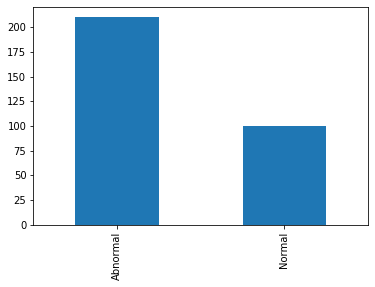

In [17]:
data =  df[(df['class'] == "Abnormal") | (df['class'] == "Normal")]

data["class"].value_counts().plot.bar()

 * Anormal Sonuçlar

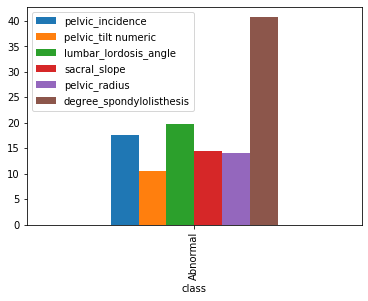

In [18]:
abnormal =  df[(df['class'] == "Abnormal")]
abnormal.groupby(["class"])["pelvic_incidence","pelvic_tilt numeric","lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis",].std().plot.bar()

* Normal Sonuçlar

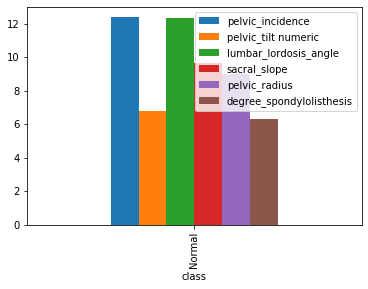

In [19]:
normal =  df[(df['class'] == "Normal")]
normal.groupby(["class"])["pelvic_incidence","pelvic_tilt numeric","lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis",].std().plot.bar()

* HEM Anormal HEM Normal Sonuçlar

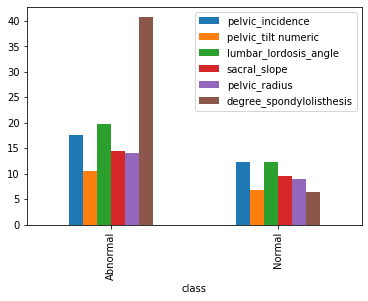

In [20]:
combinediagnosis =  df[(df['class'] == "Abnormal") | (df["class"]=="Normal")]
combinediagnosis.groupby(["class"])["pelvic_incidence","pelvic_tilt numeric","lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis",].std().plot.bar()

# Değerleri incelediğimizde Anormal teşhislerin değerler yüksek iken konduğunu gözlemlemekteyiz...
# Spondylollisthesis'in standart sapmasının teşhis koyarken ya çok yüksek yada çok düşük olduğu görülmekte

In [21]:
A=df[(df['class'] == "Abnormal")]
N=df[(df['class'] == "Normal")]


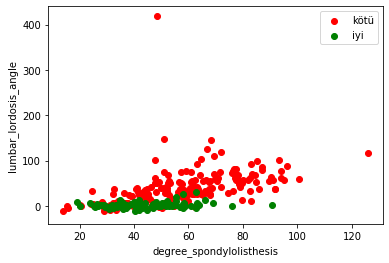

In [22]:
plt.scatter(A.lumbar_lordosis_angle,A.degree_spondylolisthesis,label="kötü",color="red")
plt.scatter(N.lumbar_lordosis_angle,N.degree_spondylolisthesis,label="iyi",color="green")
plt.xlabel("degree_spondylolisthesis")
plt.ylabel("lumbar_lordosis_angle")
plt.legend()
plt.show()
#Aşağıdaki Görselde Anormal ile normal verilerin karşılaştırması gösteriliyor.

# K-NN ( K-Nearest Neighbor) 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [24]:
df['class'] = [1 if each == "Abnormal" else 0 for each in df['class']]
y = df['class'].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
#%% normalization
x_data = df.drop(["class"],axis=1)
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [26]:
#%% find best knn score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)
score_list={}
for i in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train)
    score_list={i:knn2.score(x_test,y_test)}
    print(score_list)               #En iyi değeri bulmak icin dict kullandım yada asagıda plt kullandım
    #En iyi değer 8-11 arası gözüküyor 
    #8 numaralı değeri n_neighbors olarak atıyoruz

{1: 0.7634408602150538}
{2: 0.6774193548387096}
{3: 0.7526881720430108}
{4: 0.7311827956989247}
{5: 0.7419354838709677}
{6: 0.7311827956989247}
{7: 0.7526881720430108}
{8: 0.7634408602150538}
{9: 0.7634408602150538}
{10: 0.7634408602150538}
{11: 0.7634408602150538}
{12: 0.7526881720430108}
{13: 0.7849462365591398}
{14: 0.7634408602150538}


In [27]:

knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print("Knn score: {}".format(knn.score(x_test,y_test)))
#yuzde 76 dogrulu vardır.

Knn score: 0.7634408602150538


In [28]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

Accuracy: 0.7634408602150538
